## Library Installations

In [ ]:
# %pip install -r requirements.txt

In [6]:
# %pip install pyarrow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.2/27.2 MB 10.5 MB/s eta 0:00:00 MB/s eta 0:00:01:01
Note: you may need to restart the kernel to use updated packages.


## Python Library Imports

In [4]:
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/8f/ptz5vy0x0gg5ynykvx32k2gm0000gn/T/ipykernel_4223/920626265.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
Matplotlib is building the font cache; this may take a moment.


## Importing Delimated-File Data

In [11]:
kidney_df = pd.read_csv("Chronic_Kidney_Disease_data.csv", header="infer", engine="pyarrow", na_values=[])
kidney_df.head(10)

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential
5,6,22,0,0,0,1,39.155643,0,4.243608,8.847245,...,8.685695,12.794110,0,0,0,0.358613,5.766704,2.066944,1,Confidential
6,7,41,0,1,0,1,35.040487,0,18.224708,8.155523,...,1.995016,38.723030,0,0,1,2.744605,5.515760,3.856676,1,Confidential
7,8,72,1,0,1,3,30.760440,1,18.662717,6.179345,...,2.178408,92.939765,0,0,0,1.828836,8.620466,9.954670,0,Confidential
8,9,21,0,1,0,2,22.323130,0,9.951503,9.449652,...,9.605863,84.420517,0,0,1,3.521973,4.724738,6.725741,1,Confidential
9,10,49,0,3,0,1,24.338507,0,0.129900,6.464306,...,5.170201,4.776171,0,0,0,3.448881,8.935090,4.423802,1,Confidential


In [12]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 non-null   i

In [14]:
kidney_df["MuscleCramps"]
kidney_df.MuscleCramps
kidney_df.loc[100:500, ["MuscleCramps", "Diagnosis"]]

,MuscleCramps,Diagnosis
100,6.771399,1
101,1.349285,1
102,3.177483,1
103,2.339239,1
104,1.438768,1
...,...,...
496,3.543350,1
497,5.111127,1
498,4.651423,1
499,6.048803,1


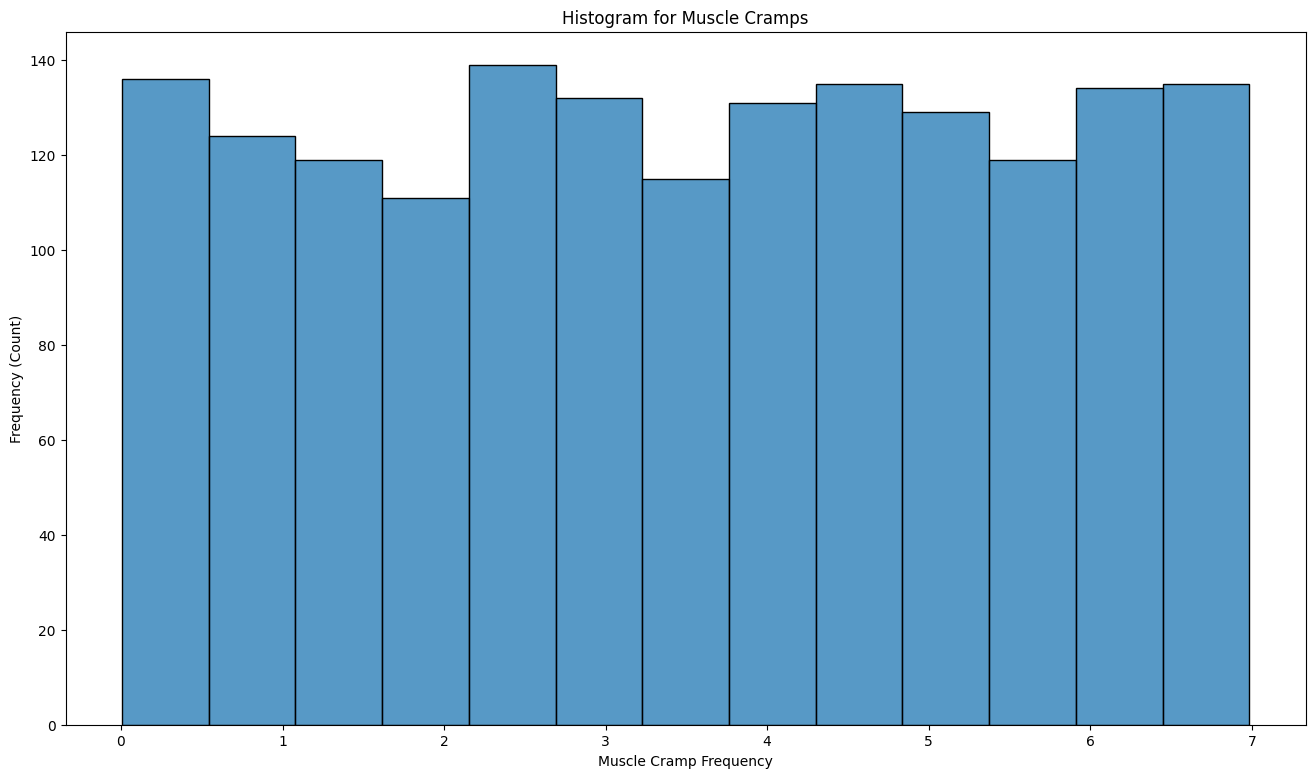

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
# kidney_df.loc[:, ["MuscleCramps"]].plot(ax=ax)
sns.histplot(data=kidney_df, x="MuscleCramps")
ax.set_title("Histogram for Muscle Cramps")
ax.set_xlabel("Muscle Cramp Frequency")
ax.set_ylabel("Frequency (Count)")

fig.savefig("muscle_cramp.png", bbox_inches = 'tight', dpi=500)